# 1A.1 - Calculs de surface et autres calculs

C'est l'histoire d'une boucle, puis d'une autre, puis enfin d'un couple de boucles, voire d'un triplé.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Enoncé

### Exercice 1 : calcul de la surface d'un cercle

On cherche à écrire une fonction qui calcule la surface d'un cercle de rayon *r*.

In [2]:
def surface_cerle(r):
    # ...
    return 0.

#### 1.1 En utilisant la constante pi

#### 1.2 Sans utiliser pi ni aucune autre fonction

Donc juste des additions, des multiplications, des divisions. On a le droit aux boucles aussi.

### Exercice 2 : tri aléatoire

On implémente le tri suivant (est-ce vraiment un tri d'ailleurs ?) :

* Dans un tableau *T*, on tire deux élements aléatoires *i < j*, si *T[i] > T[j]*, on les permute.
* On s'arrête après *n* tirages sans permutations.

### Exercice 3 : petits calculs parfaits pour une machine

On suppose que le tableau précédent est de taille *n=10*, l'algorithme précédent s'arrête après *n* tirages sans permutations. Comment choisir *n* de telle sorte que le tableau finisse trié dans 90% des cas...

## Réponses

### 1.1. calcul de la surface d'un cercle avec pi

In [5]:
from math import pi


def surface_cercle(r):
    return r ** 2 * pi

surface_cercle(5)

78.53981633974483

### 1.2. calcul de la surface d'un cercle sans pi ou autre fonction

Une approche possible est probabiliste : on construit un estimateur de $\pi$ en tirant aléatoirement des points dans un carré de côté 1. Si le point $P_i$ tombe dans le quart de cercle inscrit dans le carré, on compte 1, sinon on compte 0. Donc:

$$\frac{1}{n} \sum_{i=1}^n \mathbb{1}_{\Vert P_i \Vert^2 \leqslant 1} \rightarrow \frac{\pi}{4}$$

Ce ratio converge vers la probabilité pour le point $P_i$ de tomber dans le quart de cercle, qui est égale au ratio des deux aires : $\frac{\pi r^2}{r^2}$ avec $ r=1$.

In [6]:
import numpy


def estimation_pi(n=10000):
    rnd = numpy.random.rand(1000, 2)
    norme = rnd[:, 0] ** 2 + rnd[:, 1] ** 2
    dedans = norme <= 1
    dedans_entier = dedans.astype(numpy.int64)
    return dedans_entier.sum() / dedans.shape[0] * 4

pi = estimation_pi()
pi

3.112

In [7]:
def surface_cercle_pi(r, pi):
    return r ** 2 * pi

surface_cercle_pi(5, pi)

77.8

### 2. tri aléatoire



In [8]:
def tri_alea(T, n=1000):
    T = T.copy()
    for i in range(0, n):
        i, j = numpy.random.randint(0, len(T), 2)
        if i < j and T[i] > T[j]:
            T[i], T[j] = T[j], T[i]
    return T

tableau = [1, 3, 4, 5, 3, 2, 7, 11, 10, 9, 8, 0]
tri_alea(tableau)

[0, 1, 2, 3, 3, 4, 5, 7, 8, 9, 10, 11]

Et si *i > j*, on ne fait rien et c'est bien dommage.

In [9]:
def tri_alea2(T, n=1000):
    T = T.copy()
    for i in range(0, n):
        i = numpy.random.randint(0, len(T) - 1)
        j = numpy.random.randint(i + 1, len(T))
        if T[i] > T[j]:
            T[i], T[j] = T[j], T[i]
    return T

tableau = [1, 3, 4, 5, 3, 2, 7, 11, 10, 9, 8, 0]
tri_alea2(tableau)

[0, 1, 2, 3, 3, 4, 5, 7, 8, 9, 10, 11]

Le résultat n'est pas forcément meilleur mais il est plus rapide à obtenir puisqu'on fait un test en moins.

Et si on s'arrête quand cinq permutations aléatoires de suite ne mènen à aucune permutations dans le tableau.

In [10]:
def tri_alea3(T, c=100):
    T = T.copy()
    compteur = 0
    while compteur < c:
        i = numpy.random.randint(0, len(T) - 1)
        j = numpy.random.randint(i + 1, len(T))
        if T[i] > T[j]:
            T[i], T[j] = T[j], T[i]
            compteur = 0
        else:
            compteur += 1
    return T

tableau = [1, 3, 4, 5, 3, 2, 7, 11, 10, 9, 8, 0]
tri_alea3(tableau)

[0, 1, 2, 3, 3, 4, 5, 7, 8, 9, 10, 11]

### 3. petits calculs parfaits pour une machine

In [11]:
def est_trie(T):
    for i in range(1, len(T)):
        if T[i] < T[i-1]:
            return False
    return True

In [12]:
def eval_c(n, c, N=100):
    compteur = 0
    for i in range(N):
        T = numpy.random.randint(0, 20, n)
        T2 = tri_alea3(T, c=c)
        if est_trie(T2):
            compteur += 1
    return compteur * 1. / N

eval_c(10, 100)

0.81

In [13]:
from tqdm import tqdm  # pour afficher une barre de défilement

cs = []
ecs = []
for c in tqdm(range(1, 251, 25)):
    cs.append(c)
    ecs.append(eval_c(10, c=c))
    
ecs[-5:]

100%|██████████| 10/10 [00:01<00:00,  5.77it/s]


[0.89, 0.91, 0.98, 0.96, 0.98]

In [14]:
%matplotlib inline

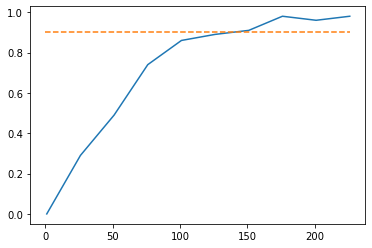

In [15]:
import matplotlib.pyplot as plt
plt.plot(cs, ecs)
plt.plot([0, max(cs)], [0.9, 0.9], '--');

La réponse se situe aux alentours de 150, on ne peut pas dire précisément car tout est aléatoire, on peut seulement estimer la distribution de ce résultat qui est aussi une variable aléatoire. Cette réponse dépend de la taille du tableau à tirer.